## Introduction:

This project is about analyzing a dataset of a stroop effect study that is conducted upon 24 participants. 

participants are presented with a list of words, with each word displayed in a color of ink. The participant has to say the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

More details can be found at https://en.wikipedia.org/wiki/Stroop_effect


## Design

In this analysis, we will be measuring the time in seconds it takes to name colors in equally sized lists for each participant in the two conditions.

### Independant Variable

The independent variable is whether the word name and font color were the same or different.

### Dependant Variable

The dependent variable was the reaction time to name the font color.

## Hypothesis

Null Hypotheses ($H_0$) = The  average  time  it  takes  to  name  the  ink  colors  for  both  congruent  and incongruent words conditions population are same.
  \\[
\mu_c-\mu_i =0
\\]

Alternative Hypotheses ($H_1$) = The average time it takes to name the ink colors for both congruent and incongruent words conditions populationare not same.
   \\[
\mu_c-\mu_i \neq 0
\\]

where $\mu_c$ is the mean of the congruent data and $\mu_i$ is the mean of the incongruent data


## Appropriate Statistical Test

The appropriate test for this data analysis would be the T-test for dependant samples because 
* the samples are dependant, the participants are measured under both the conditions(congruent and incongruent)
- We do not know the population mean and the population standard deviation
- The data is paired

## Descriptive Statistics
### Load DATA From CSV

In [2]:
import pandas as pd
import scipy.stats
import math

%matplotlib inline
import matplotlib.pyplot as plt
filename = 'stroopdata.csv'
stroop_df = pd.read_csv(filename)


# Investigating Data

 Now that the data is loaded lets take a peek at the data. We are working with 24 observations with 2 variables.

In [3]:
print(stroop_df.shape)

stroop_df.dtypes




(24, 2)


Congruent      float64
Incongruent    float64
dtype: object

In [4]:
stroop_df.head(24)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [5]:
print(stroop_df.describe())


       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000


If we calculate the Range:
Range for Congruent data: 13.698
Range for InCongruent Data: 19.568

Looks like the InCongruent data is more spread out.

Lets calculate the difference in the time btwn the two kinds of data.


In [6]:
stroop_df['diff'] = stroop_df['Incongruent']-stroop_df['Congruent']
#print(stroop_df.sort(['Congruent'],ascending=1))
print(stroop_df)



    Congruent  Incongruent    diff
0      12.079       19.278   7.199
1      16.791       18.741   1.950
2       9.564       21.214  11.650
3       8.630       15.687   7.057
4      14.669       22.803   8.134
5      12.238       20.878   8.640
6      14.692       24.572   9.880
7       8.987       17.394   8.407
8       9.401       20.762  11.361
9      14.480       26.282  11.802
10     22.328       24.524   2.196
11     15.298       18.644   3.346
12     15.073       17.510   2.437
13     16.929       20.330   3.401
14     18.200       35.255  17.055
15     12.130       22.158  10.028
16     18.495       25.139   6.644
17     10.639       20.429   9.790
18     11.344       17.425   6.081
19     12.369       34.288  21.919
20     12.944       23.894  10.950
21     14.233       17.960   3.727
22     19.710       22.058   2.348
23     16.004       21.157   5.153


## Visualizations

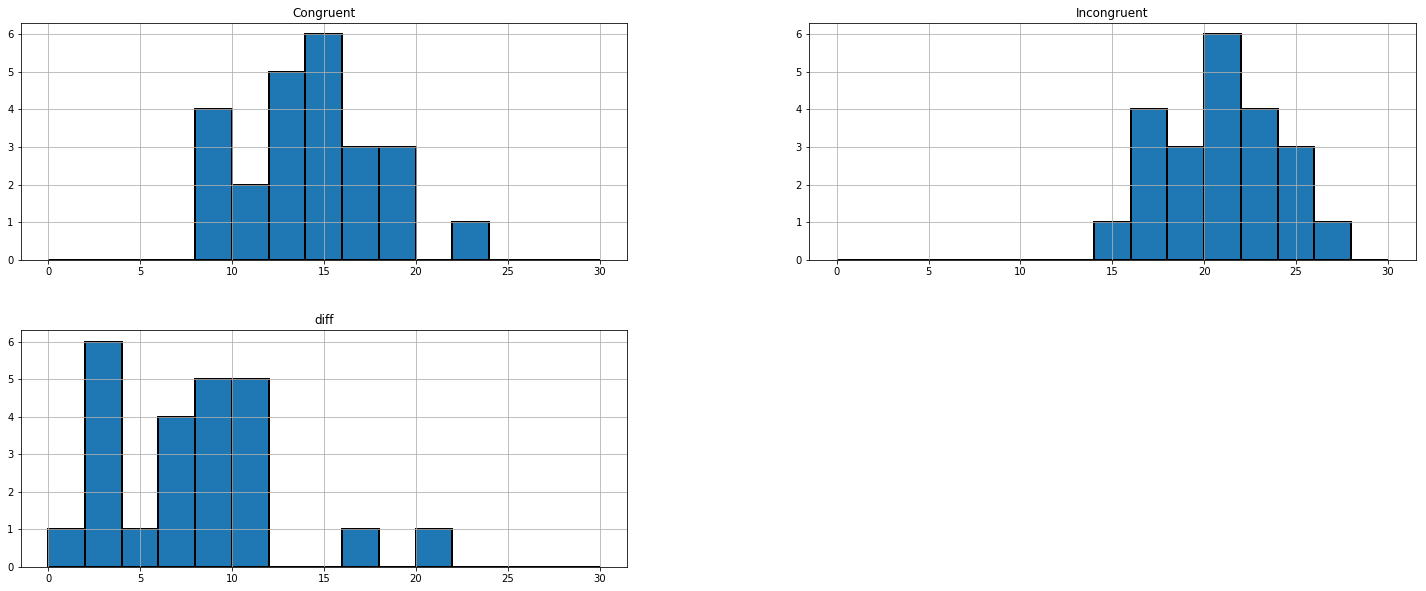

In [7]:
stroop_df.hist(figsize=(25,10),bins=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30], linewidth=2,edgecolor='black')
plt.xlabel("Time Duration")
plt.ylabel("Frequency")

In [8]:
print(stroop_df.describe())
print('-------------------------')
print('Median Values')
print(stroop_df.median())

       Congruent  Incongruent       diff
count  24.000000    24.000000  24.000000
mean   14.051125    22.015917   7.964792
std     3.559358     4.797057   4.864827
min     8.630000    15.687000   1.950000
25%    11.895250    18.716750   3.645500
50%    14.356500    21.017500   7.666500
75%    16.200750    24.051500  10.258500
max    22.328000    35.255000  21.919000
-------------------------
Median Values
Congruent      14.3565
Incongruent    21.0175
diff            7.6665
dtype: float64


The mean, median of the Congruent distribution is almost the same. By looking at the histogram we can see that the mode also is somewhere between 14 and 16. We can say that the Congruent data follows a normal distribution.

Coming to the Incongruent data, the mean is 22.05 and the median is 21.01. Looking at the mode which comes somewhere btwn 20 and 22. We can say that this data is also a normal distribution.

When we look at the time lag difference , the mean and the median are almost the same(7.96, 7.66). It looks like a bimodal distribution with 2 modes(with one mode btwn 2 and 4 and the other one btwn 8 and 12)
The lag difference btwn the congruent and Incongruent data does not follow a normal distribution.

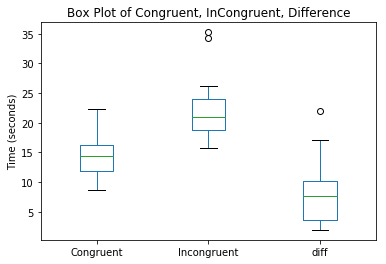

In [9]:
# Box plots of the two conditions
title = 'Box Plot of Congruent, InCongruent, Difference'
kind = 'box'

stroop_df.plot(title=title, kind=kind)
ylabel = plt.ylabel('Time (seconds)')

There are defnitely some outliers in both congruent and incongruent data. We can also notice that when we calculate the time difference between the congruent and incongruent data. When analyzing both the data, we notice that on an average a person can read congruent and incongruent words with a time lag of 7 seconds with a std deviation of 4.86 secs. There are some people who are able to read both congruent and Incongruent data with a time lag of 1 seconds. Some cases they take around 14 secs to read congruent word but finish incongruent words within 17 secs, and there are cases who took 8 secs to read congruent words but finished incongruent words within the same 17 secs.

These outliers maybe due to error or the participant taking the test multiple times and mastering it.

## Statistical Test
* Alpha Levels : $\alpha = .05$
* Degrees of freedom n=23
* t-critical Value (two-tails) = 2.069 and -2.069
* Our point estimate for the difference of the means($\mu_c - \mu_i$) is: 14.05 - 22.02 = -7.97 

Our standard deviation of the differences is calculated below.

In [10]:
std_dev = stroop_df['diff'].std()
print(std_dev)

4.864826910359056


Our T-Statistic will be

In [11]:
tstatistic = -7.97/(std_dev/math.sqrt(24))
print(tstatistic)

-8.025951841538816


### Result:


* Reject H0 because t-value falls within the lower tail of critical region

* Conclusion: The time to complete the incongruent task is significantly different with the time to complete the congruent task. Moreover, the time to complete the incongruent task is significantly greater than the time to complete the congruent task because the t-value falls within the lower tail of the critical region.

 The results indicated that the incongruent condition ($\mu_i = 22.02$, $\sigma_i = 4.80$) took particants significantly longer to recite than the congruent condition($\mu_c = 14.05$, $\sigma_c = 3.56$) because  t-value falls within the lower tail of the critical region



In [12]:
print(scipy.stats.t.ppf(q=0.025,df=23))


-2.06865761042


## Discussion

As analyzed above, the data suggests that people would take longer time to tell the color of the word when the written word and its color are incongruent. 
A possible explanation would be that human brain associates text with reading first and then understanding what it is or picturizing it and our brains are trained in this way. In the incongruent condition we first see the text and then we need to associate with the color which takes slighly longer time. Maybe it would take lesser time if shapes or drawings were given instead of text. 
I feel that there would be a different kind of time reaction if the participants were given the incongruent word first and the congruent word next.